In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_theme()

def countMissingValues(df, attr):
    count = df[attr].isna().sum()
    print(count, "missing", attr, "values")
    return count

def convert_numeric(x):
    try:
        return pd.to_numeric(x)
    except:
        return x

def object_to_multitype(df, attr):
    numerical_conversion = df[attr].apply(convert_numeric)
    # float.is_integer(np.nan) returns False
    # float.is_integer(5.4) returns False
    # float.is_integer(5.0) returns True

    are_floats = numerical_conversion.apply(lambda x:not float.is_integer(x) if type(x) == np.float64 else False)
    print("Number of floats:   ", are_floats.sum())
    
    are_integers = numerical_conversion.apply(lambda x:float.is_integer(x) if type(x) == np.float64 else type(x) == np.int64)
    print("Number of integers: ", are_integers.sum())
    
    are_strings = numerical_conversion.apply(lambda x:type(x) == str)
    print("Number of strings:  ", are_strings.sum())
    
    return are_floats, are_integers, are_strings

In [2]:
datasetTweetsCSVPath = "./dataset/tweets.csv"

# Tweets: Overview

In [3]:
df_tweets = pd.read_csv(datasetTweetsCSVPath, sep=',', index_col=0)

In [4]:
numberOfRows, numberOfColumns = df_tweets.shape
print("rows =", numberOfRows)
print("columns =", numberOfColumns)

rows = 13664696
columns = 9


In [5]:
df_tweets.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [6]:
df_tweets.dtypes

user_id           object
retweet_count     object
reply_count       object
favorite_count    object
num_hashtags      object
num_urls          object
num_mentions      object
created_at        object
text              object
dtype: object

## Plot missing values

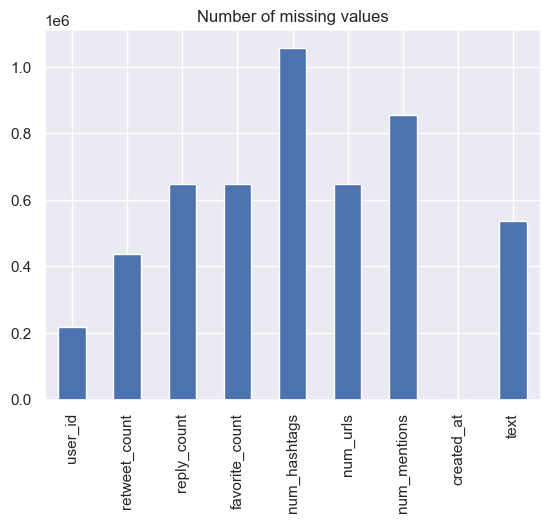

In [18]:
df_tweets.isna().sum().plot(kind='bar', title='Number of missing values')
#plt.yscale('log')
plt.savefig("images/hist_tweets_numberof_missing_values.png")
plt.show()

# Tweets: Attributes analysis

## Index

In [7]:
uniqueTweetsCount = len(df_tweets.index.unique())
print(uniqueTweetsCount, "/", numberOfRows, "\t\t")

11672136 / 13664696 		


In [8]:
print(df_tweets.index.isna().sum(), "missing indexes")
df_tweets[df_tweets.index.isna()]

2 missing indexes


,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
NaN,466475273,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-08 07:09:46,NaN
NaN,87334609,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-13 01:10:44,NaN


In [12]:
df_tweets.index.duplicated(keep='first').sum()

1992560

## User_id

In [13]:
len(df_tweets.user_id.unique())

222286

In [14]:
countMissingValues(df_tweets, "user_id")

217283 missing user_id values


217283

In [15]:
are_floats, are_integers, are_strings = object_to_multitype(df_tweets, "user_id")

Number of floats:    0
Number of integers:  13230801
Number of strings:   216612


## Retweet_count

In [16]:
missingRetweetCount = countMissingValues(df_tweets, "retweet_count")
missingRetweetCount

437134 missing retweet_count values


437134

In [17]:
are_floats, are_integers, are_strings = object_to_multitype(df_tweets, "retweet_count")

Number of floats:    1
Number of integers:  13039239
Number of strings:   188322


In [5]:
df_tweets[are_floats]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
25722144302443379,201350011,inf,NaN,NaN,NaN,NaN,NaN,2018-05-05 15:15:05,@EnlajugadaRCN @casaleantonio @jorgebermudezh ...


In [21]:
def IsNumber(num):
    try:
        val = float(num)
        return not math.isnan(val)# and not float.is_integer(val)
    except ValueError:
        return False

numbers = df_tweets.retweet_count.apply(IsNumber).sum()
print("Number of not nan integers or floats:", numbers)
print("Number of NaN values or strings:", numberOfRows-numbers)
print("Number of strings:", numberOfRows-numbers-missingRetweetCount)

Number of not nan integers or floats: 13039245
Number of NaN values or strings: 625451
Number of strings: 188317


## Reply_count

In [22]:
countMissingValues(df_tweets, "reply_count")

647878 missing reply_count values


647878

In [6]:
are_floats, are_integers, are_strings = object_to_multitype(df_tweets, "reply_count")

Number of floats:    1
Number of integers:  12855191
Number of strings:   161626


In [8]:
df_tweets[are_floats]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
732386427,466377491,0,inf,1.0,0.0,NaN,0,2019-08-29 13:04:45,Prima di andare via sorridi un po' ma comunque...


In [10]:
df_tweets[are_strings].head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
880585309694729,467154855,1,0ngi,NaN,0.0,0.0,0,2019-09-30 18:43:28,"Non ce l'ho particolarmente coi bimbominkia, m..."
584866617486297,1297673149,0,ggbdk7byp,0.0,0.0,0.0,NaN,2020-02-18 04:58:02,Home to pack new set of things...
50833457415,2585393083,4d7,wnkz8,0.0,0.0,0.0,1,2020-04-24 05:16:47,@MallikaYa
141660196835082,h5a67,0,2kzlx,0.0,0.0,0.0,0,2019-11-02 13:14:15,Aiutati che Dio se ne frega.
115054719,468055750,0,bre,0.0,0.0,0.0,NaN,2019-08-01 17:15:27,MAGLIONE=Indumento che I BAMBINI devono indoss...


In [11]:
df_tweets[are_integers].head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


## Favorite_count

In [23]:
countMissingValues(df_tweets, "favorite_count")

647542 missing favorite_count values


647542

In [12]:
are_floats, are_integers, are_strings = object_to_multitype(df_tweets, "favorite_count")

Number of floats:    0
Number of integers:  12856599
Number of strings:   160555


In [13]:
df_tweets[are_strings].head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
487190144,NaN,1,NaN,ai6,NaN,0.0,NaN,2019-10-30 06:11:12,NaN
820421044889959764,220602388,4345,NaN,laco,0.0,0.0,1,2018-06-30 21:18:08,RT @TheBatman: WE ARE NOT ADDING HASHTAGS TO T...
160242657,347579782,0,0.0,6q3i9,0.0,NaN,0,2019-10-25 22:22:29,You must begin to think of yourself as becomin...
64829674,72196532,0,0.0,iujpyhwi,NaN,0.0,0,2020-03-28 14:39:17,Simula bukas may hihintayin na ako. Sana hindi...
319356420,538904290,2,0.0,n25521,s2oww,0.0,0,2019-07-24 07:36:52,âabituato al fatto che tutto va male.â


## Num_hashtags

In [24]:
countMissingValues(df_tweets, "num_hashtags")

1057524 missing num_hashtags values


1057524

In [14]:
are_floats, are_integers, are_strings = object_to_multitype(df_tweets, "num_hashtags")

Number of floats:    0
Number of integers:  12501019
Number of strings:   106153


In [15]:
df_tweets[are_strings].head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
889911492460117211,999662546,0,0.0,NaN,2wtmdqfavz,0.0,1,2019-04-30 16:49:07,@lothomason_
86292257,926785916,0,NaN,0.0,uawehdge,0.0,1,2020-02-06 04:44:11,@alohatomlin youre the trash!
59506645605,NaN,0,0.0,0.0,6r5ak3,0.0,0,2019-10-02 17:25:04,"I get to go to a lot of overseas places, like ..."
166256377543106969,938206194,1,0.0,NaN,kd7,0.0,2,2020-04-28 04:39:46,RT @092Melis: @FelipePineda_ OMG youcould hav...
319356420,538904290,2,0.0,n25521,s2oww,0.0,0,2019-07-24 07:36:52,âabituato al fatto che tutto va male.â


## Num_urls

In [25]:
countMissingValues(df_tweets, "num_urls")

648623 missing num_urls values


648623

In [16]:
are_floats, are_integers, are_strings = object_to_multitype(df_tweets, "num_urls")

Number of floats:    0
Number of integers:  12855743
Number of strings:   160330


## Num_mentions

In [26]:
countMissingValues(df_tweets, "num_mentions")

854165 missing num_mentions values


854165

In [17]:
are_floats, are_integers, are_strings = object_to_multitype(df_tweets, "num_mentions")

Number of floats:    0
Number of integers:  12676706
Number of strings:   133825


## Created_at

In [19]:
countMissingValues(df_tweets, "created_at")

0 missing created_at values


0

In [20]:
are_floats, are_integers, are_strings = object_to_multitype(df_tweets, "created_at")

Number of floats:    0
Number of integers:  0
Number of strings:   13664696


In [21]:
df_tweets.created_at = pd.to_datetime(df_tweets.created_at, format='%Y-%m-%d %H:%M:%S')
df_tweets.dtypes

user_id                   object
retweet_count             object
reply_count               object
favorite_count            object
num_hashtags              object
num_urls                  object
num_mentions              object
created_at        datetime64[ns]
text                      object
dtype: object

In [22]:
df_tweets.created_at.max()

Timestamp('2040-04-27 11:03:25')

In [23]:
df_tweets.created_at.min()

Timestamp('1953-04-17 12:24:33')

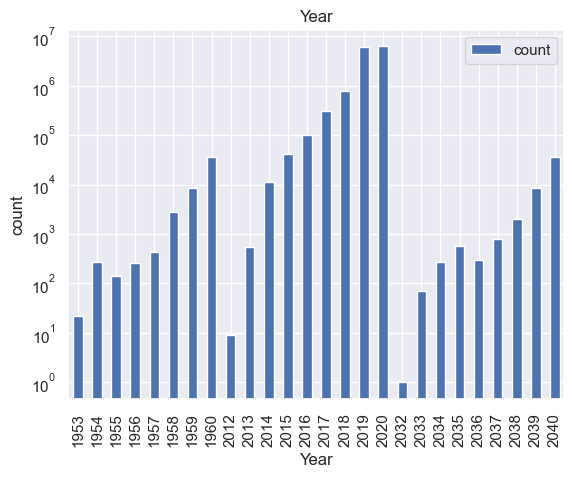

In [24]:
# Group by year
created_at_by_year = df_tweets.groupby([df_tweets.created_at.dt.year.rename("year")]).created_at.agg(count="count").reset_index()
created_at_by_year.plot(kind='bar', title='Year', x="year", y="count")
plt.yscale('log')
plt.ylabel("count")
plt.xlabel("Year")
plt.savefig("images/hist_tweets_created_at_year.png")
plt.show()

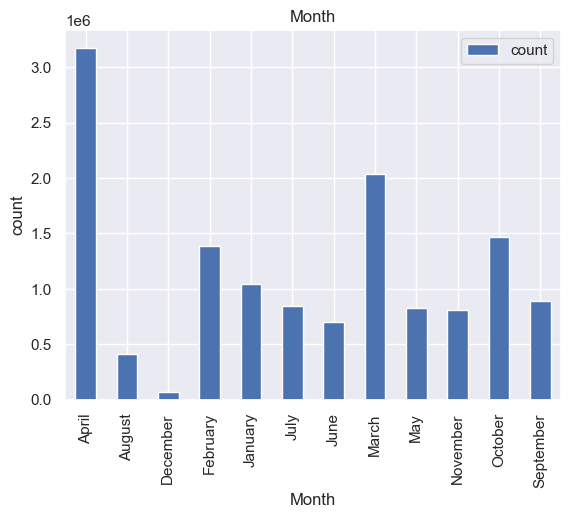

In [25]:
# Group by month
created_at_by_month = df_tweets.groupby([df_tweets.created_at.dt.month_name().rename("month")]).created_at.agg(count="count").reset_index()
created_at_by_month.plot(kind='bar', title='Month', x="month", y="count")
plt.ylabel("count")
plt.xlabel("Month")
plt.savefig("images/hist_tweets_created_at_month.png")
plt.show()

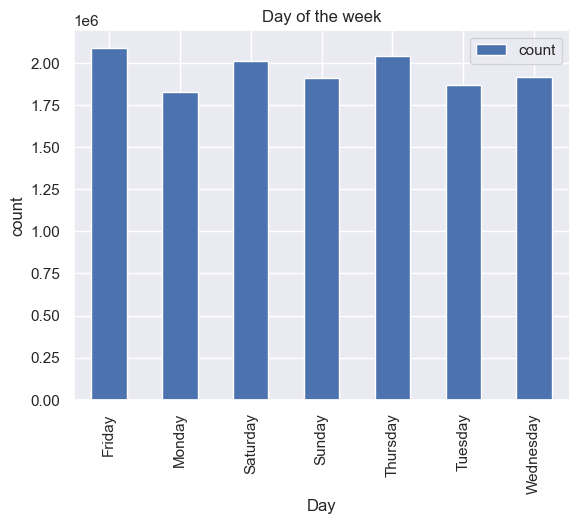

In [26]:
# Group by day of the week
created_at_by_day = df_tweets.groupby([df_tweets.created_at.dt.day_name().rename("day")]).created_at.agg(count="count").reset_index()
created_at_by_day.plot(kind='bar', title='Day of the week', x="day", y="count")
plt.ylabel("count")
plt.xlabel("Day")
plt.savefig("images/hist_tweets_created_at_dayoftheweek.png")
plt.show()

## Text

In [28]:
countMissingValues(df_tweets, "text")

537721 missing text values


537721

In [45]:
df_tweets[df_tweets.user_id == "29552151"].head(2)

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
491274532679081984,29552151,0,0,0,0,0,0,2019-07-23 17:32:30,"Spent the majority of my day drawing around, c..."
488693001456463872,29552151,0,0,0,0,0,0,2019-07-16 14:34:25,We all love dem cuddles. http://t.co/fPrcnUfacS


In [44]:
df_tweets[df_tweets.user_id == "2956613720"].head(2)

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
586696968333725696,2956613720,0,0,0,0,0,1,2020-04-12 01:07:12,@bernardchickey I've heard of something called...
560136340663070720,2956613720,13933,0,0,0,0,2,2020-01-29 18:04:45,RT @stephenfry: If physical diseases were trea...


In [43]:
df_tweets[df_tweets.user_id == "2904858613"].head(2)

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
577066752946794496,2904858613,0,0,0,0,0,1,2020-03-16 11:20:09,@GinnyBlackmore fucking sad
577046340795957248,2904858613,0,0,0,0,0,1,2020-03-16 09:59:03,@NataliaKills had the right to an opinion mean...
